In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loadind Data 

In [2]:
#df = pd.read_csv("new.csv")

In [3]:
# Advanced CSV loading example

df = pd.read_csv("bank-full.csv") 

data = []
for i in df.values:
    for j in i:
        data.append(j.replace('"','').split(';'))

In [4]:

columns = 0
for i in df.columns:
    columns = i.replace('"','').split(';')
columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [5]:
df = pd.DataFrame(data,columns=columns)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

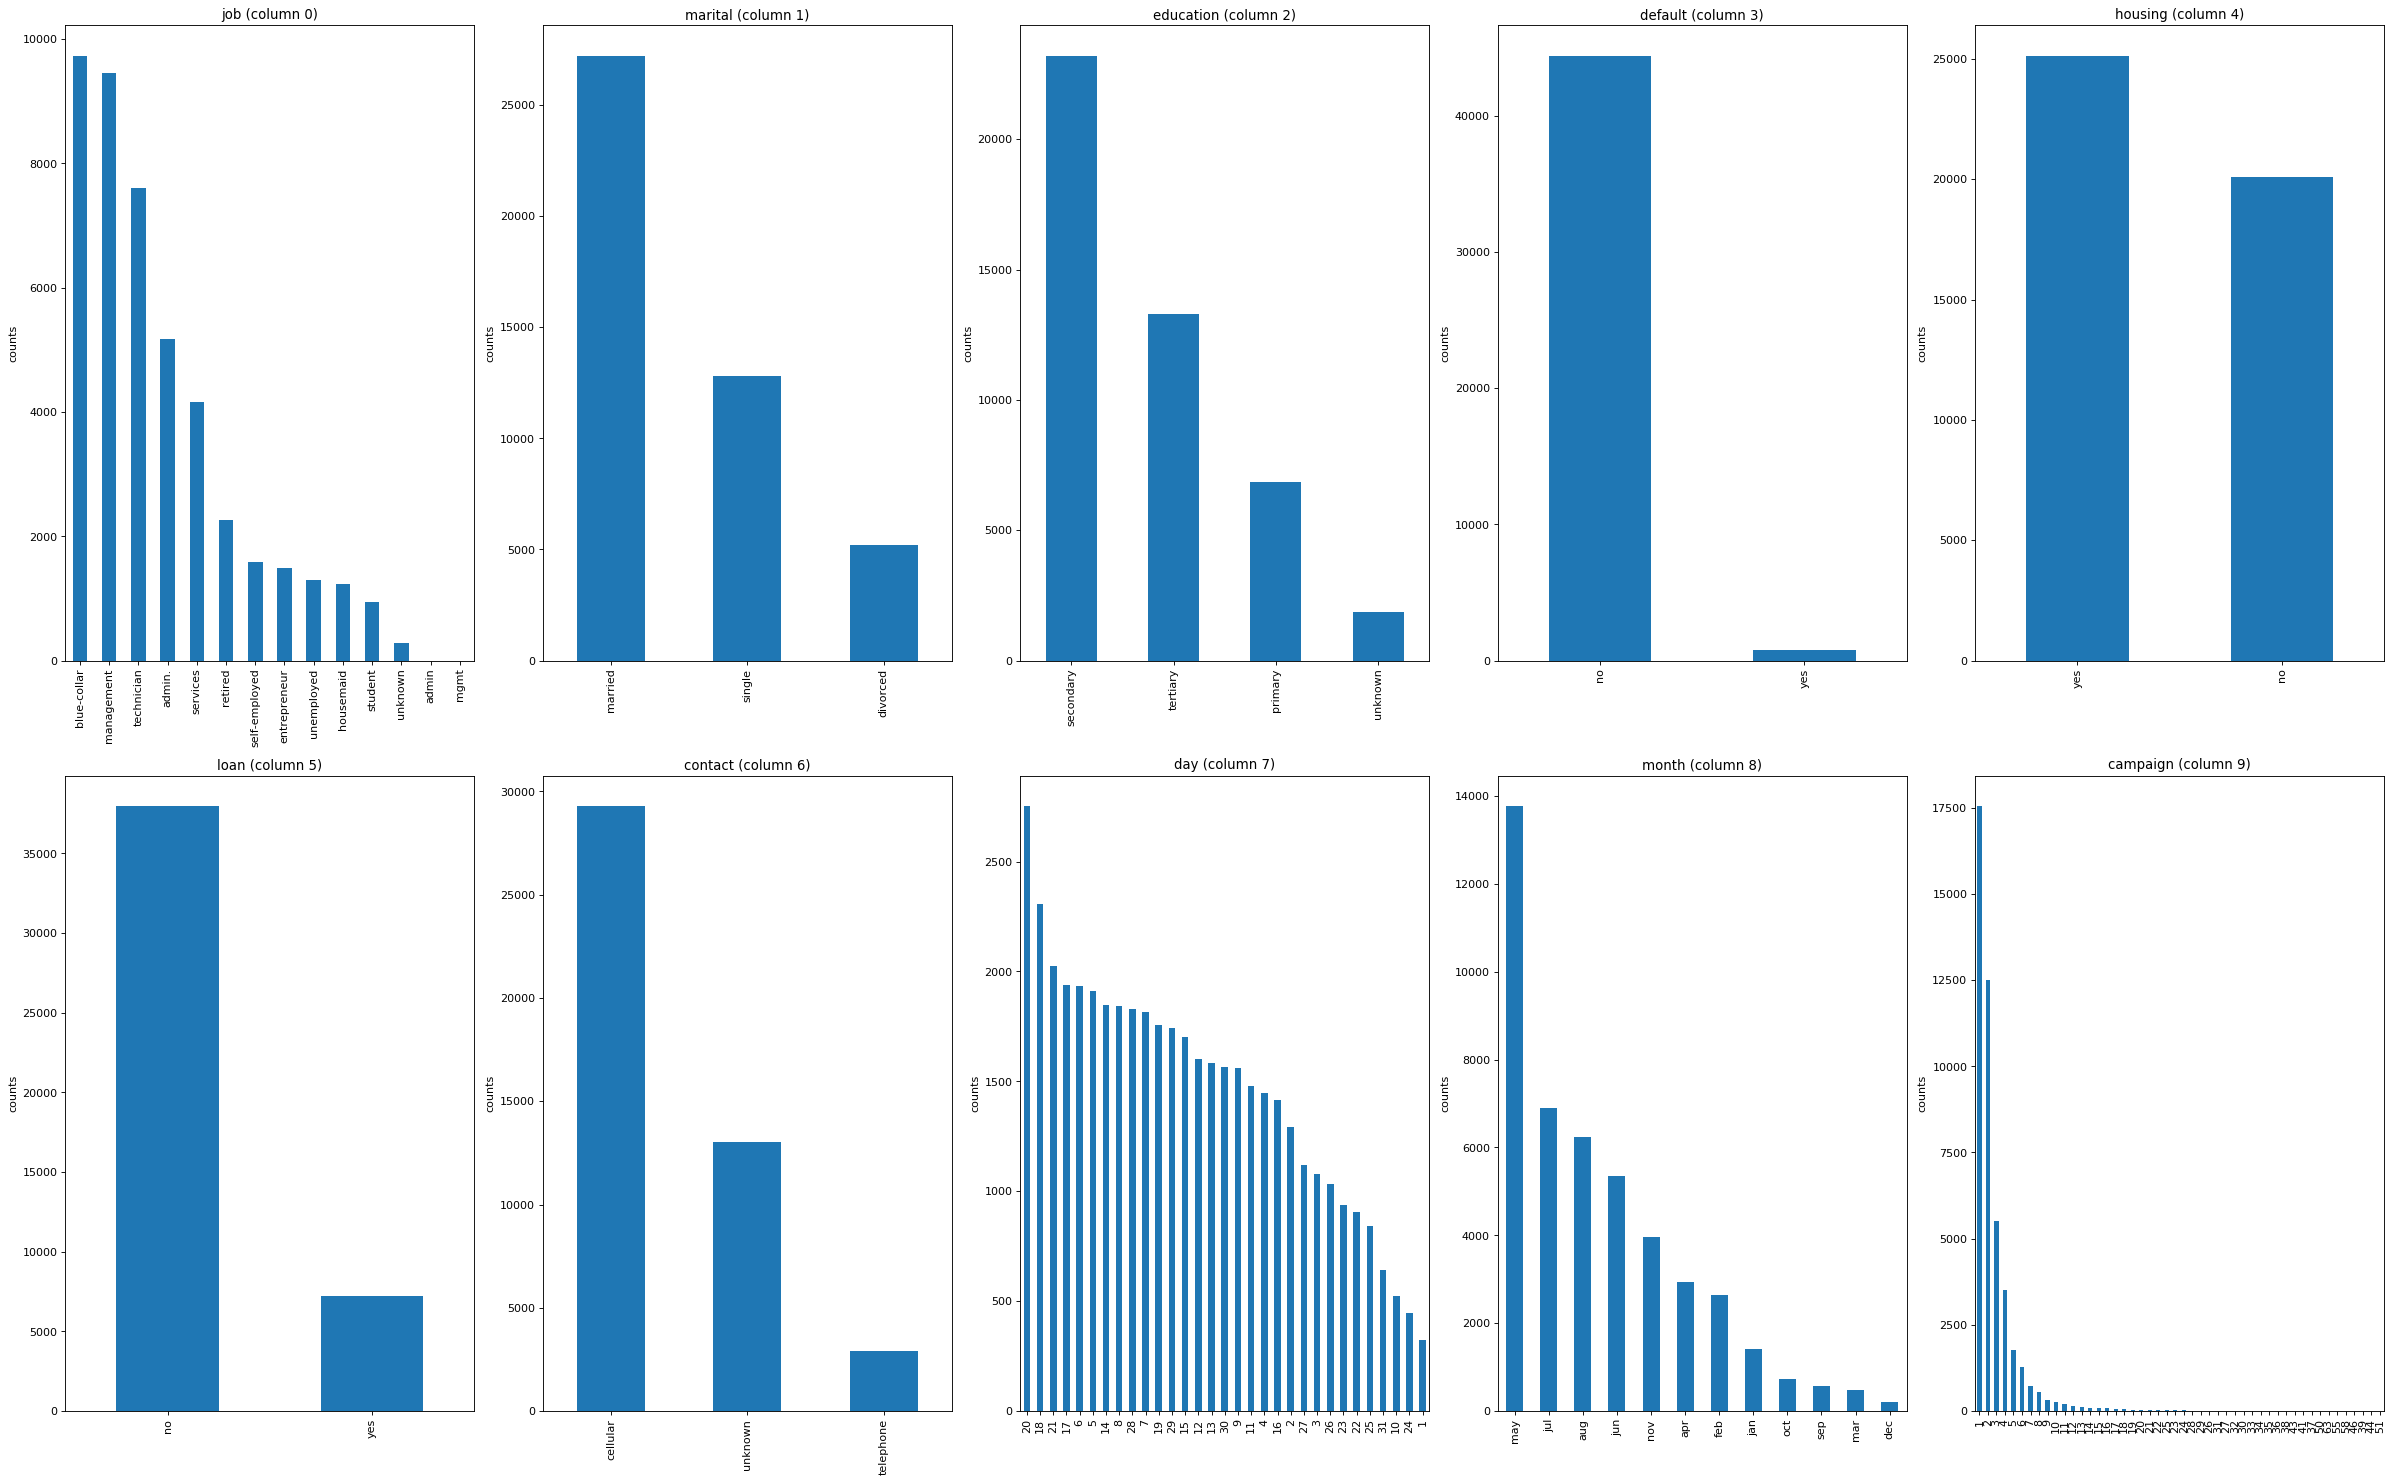

In [9]:
plotPerColumnDistribution(df, 10, 5)

# Missing Value in Data 

In [10]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


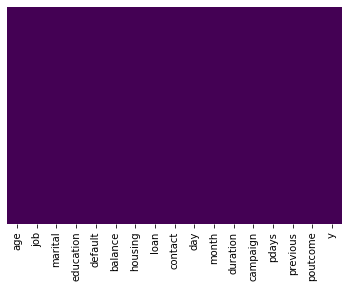

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null object
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null object
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null object
month        45211 non-null object
duration     45211 non-null object
campaign     45211 non-null object
pdays        45211 non-null object
previous     45211 non-null object
poutcome     45211 non-null object
y            45211 non-null object
dtypes: object(17)
memory usage: 5.9+ MB


# Target variable 

no     39922
yes     5289
Name: y, dtype: int64

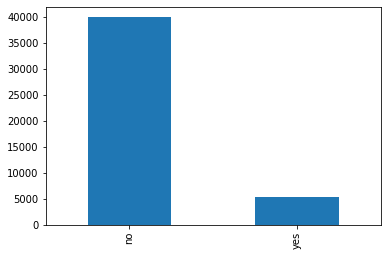

In [13]:

df['y'].value_counts().plot.bar()
df['y'].value_counts()

# As per above plot we can see that Data is unbalanced

# Count Or Frequency Encoding

In [14]:
for feature in df.columns[:]:
    print(feature,":",len(df[feature].unique()),'labels')

age : 77 labels
job : 14 labels
marital : 3 labels
education : 4 labels
default : 2 labels
balance : 7168 labels
housing : 2 labels
loan : 2 labels
contact : 3 labels
day : 31 labels
month : 12 labels
duration : 1573 labels
campaign : 48 labels
pdays : 559 labels
previous : 41 labels
poutcome : 4 labels
y : 2 labels


# Numerical Varible 

age : 77 labels

balance : 7168 labels

duration : 1573 labels


In [15]:

print(df['age'].value_counts())

df['age'].unique()


32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
92       2
90       2
95       2
94       1
Name: age, Length: 77, dtype: int64


array(['58', '44', '33', '47', '35', '28', '42', '43', '41', '29', '53',
       '57', '51', '45', '60', '56', '32', '25', '40', '39', '52', '46',
       '36', '49', '59', '37', '50', '54', '55', '48', '24', '38', '31',
       '30', '27', '34', '23', '26', '61', '22', '21', '20', '66', '62',
       '83', '75', '67', '70', '65', '68', '64', '69', '72', '71', '19',
       '76', '85', '63', '90', '82', '73', '74', '78', '80', '94', '79',
       '77', '86', '95', '81', '18', '89', '84', '87', '92', '93', '88'],
      dtype=object)

In [16]:

print(df['balance'].value_counts())
df['balance'].unique()


0        3514
1         195
2         156
4         139
3         134
         ... 
-690        1
6182        1
4635        1
7951        1
11285       1
Name: balance, Length: 7168, dtype: int64


array(['2143', '29', '2', ..., '8205', '14204', '16353'], dtype=object)

In [17]:

print(df['duration'].value_counts())
df['duration'].unique()


124     188
90      184
89      177
114     175
104     175
       ... 
1282      1
1374      1
1273      1
1767      1
1049      1
Name: duration, Length: 1573, dtype: int64


array(['261', '151', '76', ..., '1298', '1246', '1556'], dtype=object)

# Categorical varible 


    
marital : 3 labels
    
education : 4 labels
    
default : 2 labels

housing : 2 labels
    
loan : 2 labels
    
contact : 3 labels
    
poutcome : 4 labels
    
Target : 2 labels
    

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


array(['married', 'single', 'divorced'], dtype=object)

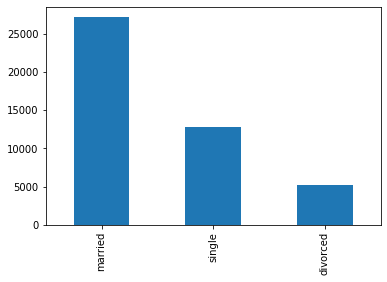

In [18]:
print(df['marital'].value_counts())
df['marital'].value_counts().plot.bar()
df['marital'].unique()


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

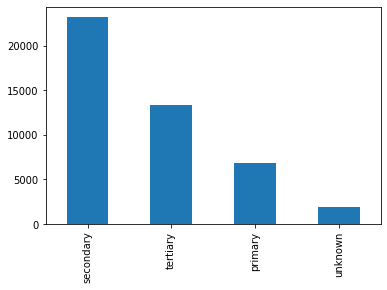

In [19]:
print(df['education'].value_counts())
df['education'].value_counts().plot.bar()
df['education'].unique()


no     44396
yes      815
Name: default, dtype: int64


array(['no', 'yes'], dtype=object)

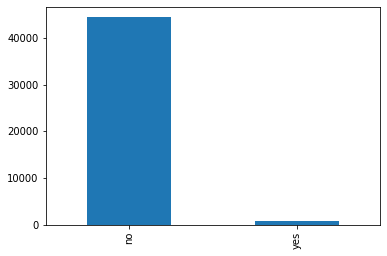

In [20]:
print(df['default'].value_counts())
df['default'].value_counts().plot.bar()
df['default'].unique()


yes    25130
no     20081
Name: housing, dtype: int64


array(['yes', 'no'], dtype=object)

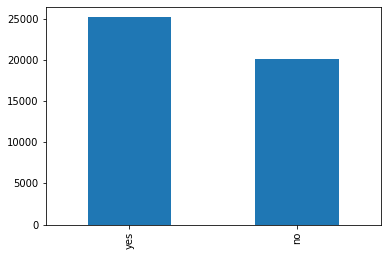

In [21]:
print(df['housing'].value_counts())
df['housing'].value_counts().plot.bar()
df['housing'].unique()


no     37967
yes     7244
Name: loan, dtype: int64


array(['no', 'yes'], dtype=object)

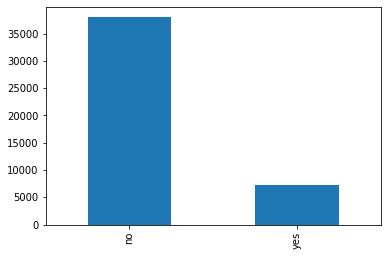

In [22]:
print(df['loan'].value_counts())

df['loan'].value_counts().plot.bar()
df['loan'].unique()


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


array(['unknown', 'cellular', 'telephone'], dtype=object)

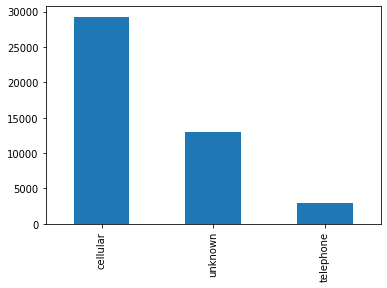

In [23]:
print(df['contact'].value_counts())
df['contact'].value_counts().plot.bar()
df['contact'].unique()


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


array(['unknown', 'failure', 'other', 'success'], dtype=object)

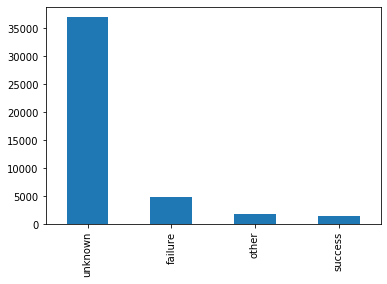

In [24]:
print(df['poutcome'].value_counts())
df['poutcome'].value_counts().plot.bar()
df['poutcome'].unique()



# Categorical varible 

job : 14 labels
    
day : 31 labels
    
    
month : 12 labels
    
    
campaign : 48 labels
    
    
pdays : 559 labels
    
    
previous : 41 labels
    


blue-collar      9732
management       9456
technician       7597
admin.           5169
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
admin               2
mgmt                2
Name: job, dtype: int64


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'mgmt', 'retired', 'admin', 'admin.', 'services',
       'self-employed', 'unemployed', 'housemaid', 'student'],
      dtype=object)

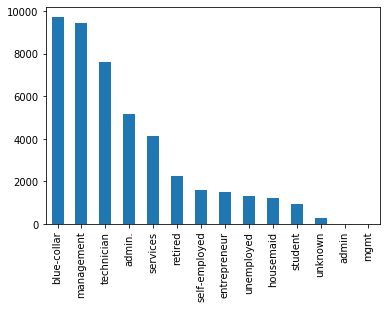

In [25]:
print(df['job'].value_counts())
df['job'].value_counts().plot.bar()
df['job'].unique()


20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64


array(['5', '6', '7', '8', '9', '12', '13', '14', '15', '16', '19', '20',
       '21', '23', '26', '27', '28', '29', '30', '2', '3', '4', '11',
       '17', '18', '24', '25', '1', '10', '22', '31'], dtype=object)

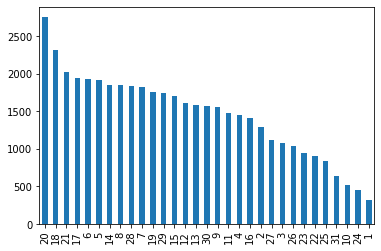

In [26]:
print(df['day'].value_counts())
df['day'].value_counts().plot.bar()
df['day'].unique()


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


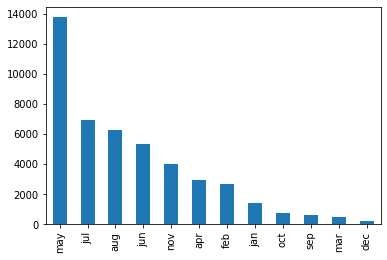

In [27]:

df['month'].value_counts().plot.bar()
df['month'].unique()
print(df['month'].value_counts())

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
35        4
36        4
38        3
43        3
41        2
37        2
50        2
63        1
55        1
58        1
46        1
39        1
44        1
51        1
Name: campaign, dtype: int64


array(['1', '2', '3', '5', '4', '6', '7', '8', '9', '10', '11', '12',
       '13', '19', '14', '24', '16', '32', '18', '22', '15', '17', '25',
       '21', '43', '51', '63', '41', '26', '28', '55', '50', '38', '23',
       '20', '29', '31', '37', '30', '46', '27', '58', '33', '35', '34',
       '36', '39', '44'], dtype=object)

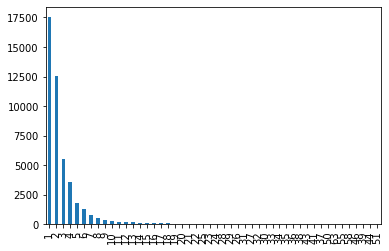

In [28]:
print(df['campaign'].value_counts())
df['campaign'].value_counts().plot.bar()
df['campaign'].unique()


-1     36954
182      167
92       147
183      126
91       126
       ...  
481        1
32         1
633        1
603        1
396        1
Name: pdays, Length: 559, dtype: int64


array(['-1', '151', '166', '91', '86', '143', '147', '89', '140', '176',
       '101', '174', '170', '167', '195', '165', '129', '188', '196',
       '172', '118', '119', '104', '171', '117', '164', '132', '131',
       '123', '159', '186', '111', '115', '116', '173', '178', '110',
       '152', '96', '103', '150', '175', '193', '181', '185', '154',
       '145', '138', '126', '180', '109', '158', '168', '97', '182',
       '127', '130', '194', '125', '105', '102', '26', '179', '28', '183',
       '155', '112', '120', '137', '124', '187', '190', '113', '162',
       '134', '169', '189', '8', '144', '191', '184', '177', '5', '99',
       '133', '93', '92', '10', '100', '156', '198', '106', '153', '146',
       '128', '7', '121', '160', '107', '90', '27', '197', '136', '139',
       '122', '157', '149', '135', '30', '114', '98', '192', '163', '34',
       '95', '141', '31', '199', '94', '108', '29', '268', '247', '253',
       '226', '244', '239', '245', '204', '231', '238', '258', '230'

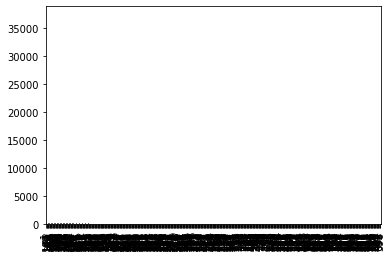

In [29]:
print(df['pdays'].value_counts())
df['pdays'].value_counts().plot.bar()
df['pdays'].unique()


0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
22         6
18         6
24         5
27         5
29         4
21         4
25         4
30         3
28         2
38         2
37         2
26         2
51         1
40         1
275        1
35         1
55         1
58         1
32         1
41         1
Name: previous, dtype: int64


array(['0', '3', '1', '4', '2', '11', '16', '6', '5', '10', '12', '7',
       '18', '9', '21', '8', '14', '15', '26', '37', '13', '25', '20',
       '27', '17', '23', '38', '29', '24', '51', '275', '22', '19', '30',
       '58', '28', '32', '40', '55', '35', '41'], dtype=object)

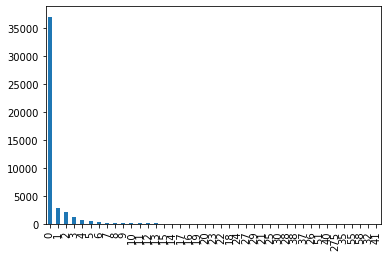

In [30]:
print(df['previous'].value_counts())
df['previous'].value_counts().plot.bar()
df['previous'].unique()


In [36]:
# Correlation matrix
df = pd.read_csv("new.csv")
df.dataframeName = 'new.csv' 
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

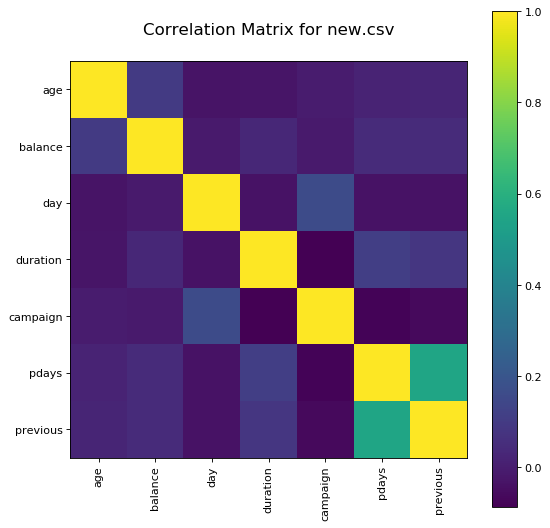

In [37]:
plotCorrelationMatrix(df, 8)

In [38]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

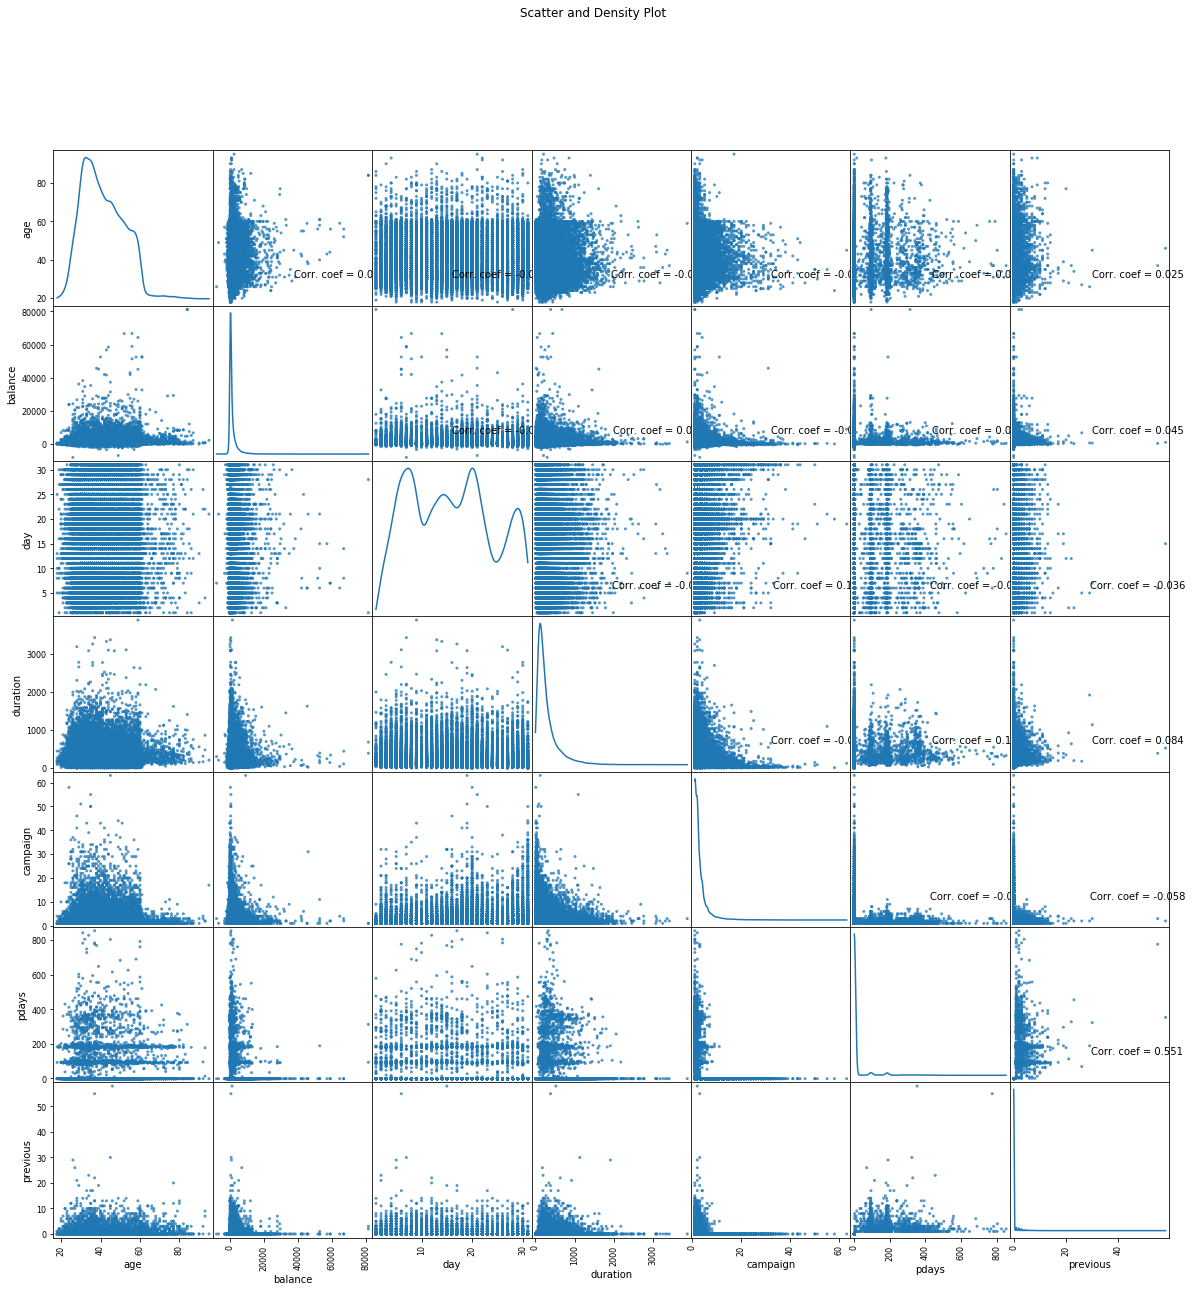

In [39]:
plotScatterMatrix(df, 20, 10)
